# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

import warnings; warnings.simplefilter('ignore')

# read the original data

In [5]:
# read original data

train = pd.read_csv('/Users/MAIN/Desktop/python/train_hid.csv')
test = pd.read_csv('/Users/MAIN/Desktop/python/test_hid.csv')

trainData  = train.drop(['Activity'], axis=1).values
trainLabel = train.Activity.values
testData  = test.drop(['Activity'], axis=1).values
testLabel = test.Activity.values

# show dimensions 

In [6]:
print("Dimension for Original Training Set: ")
print(trainData.shape)
print("Dimension for Original Test Set: ")
print(testData.shape)

Dimension for Original Training Set: 
(700, 100)
Dimension for Original Test Set: 
(300, 100)


# scatter plot

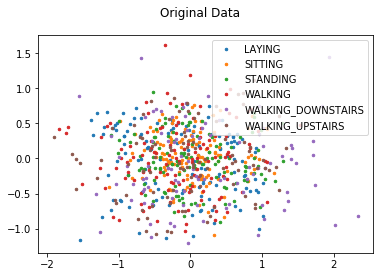

In [8]:
df = pd.DataFrame(dict(x=trainData[:,10],y=trainData[:,20],label=trainLabel))
groups = df.groupby('label')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=5, label=name)
plt.suptitle('Original Data')
ax.legend()
plt.show()

# apply PCA

Explained Variance Ratio for Each PC: 
[0.64996688 0.05132579 0.03982051 0.01862506 0.01723368 0.01348143
 0.01193552 0.01107072 0.01022878 0.00896485 0.00821755 0.00755429
 0.00664394 0.00607426 0.00537396 0.00523753 0.00463933 0.00450109
 0.00420028 0.00415306 0.00407462 0.0039826  0.00358539 0.00352009
 0.00333185 0.00327678 0.00314619 0.00306474 0.00290285 0.00284538
 0.0027179  0.00268387 0.00261196 0.00248739 0.00233408 0.00229762
 0.00222362 0.00215263 0.00209006 0.00198875 0.0019078  0.00188093
 0.00183413 0.00174148 0.00164251 0.00159988 0.00150963 0.00147088
 0.00142336 0.00137828]
Cumulated Explained Variance Ratio: 
0.9629557919324797


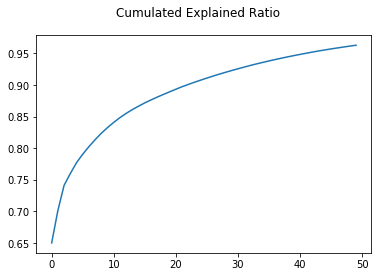

In [9]:
# apply PCA

pca = PCA(n_components=50)
pca.fit(trainData)
print("Explained Variance Ratio for Each PC: ")
print(pca.explained_variance_ratio_)
print("Cumulated Explained Variance Ratio: ")
print(sum(pca.explained_variance_ratio_))
varexp = np.cumsum(pca.explained_variance_ratio_)
plt.suptitle('Cumulated Explained Ratio')
plt.plot(varexp)
plt.show()

# transform datasets

In [10]:
train_pca = pca.transform(trainData)
test_pca = pca.transform(testData)
print("Dimension for Transformed Training Set: ")
print(train_pca.shape)
print("Dimension for Transformed Training Set: ")
print(test_pca.shape)

Dimension for Transformed Training Set: 
(700, 50)
Dimension for Transformed Training Set: 
(300, 50)


# scatter plot

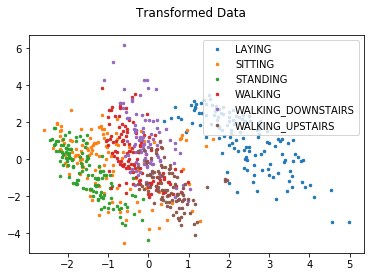

In [11]:
df = pd.DataFrame(dict(x=train_pca[:,2],y=train_pca[:,1],label=trainLabel))
groups = df.groupby('label')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=5, label=name)
plt.suptitle('Transformed Data')
ax.legend()
plt.show()

# save PCA files

In [12]:
# save PCA data

traindf = pd.DataFrame(train_pca)
testdf = pd.DataFrame(test_pca)
traindf = pd.concat([traindf.reset_index(drop=True), pd.DataFrame(trainLabel)], axis=1)
testdf = pd.concat([testdf.reset_index(drop=True), pd.DataFrame(testLabel)], axis=1)

cnames = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
          'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
          'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
          'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40',
          'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50','Activity']
traindf.columns = cnames
testdf.columns = cnames
traindf.to_csv('/Users/MAIN/Desktop/python/train_hid_pca.csv',index=False)
testdf.to_csv('/Users/MAIN/Desktop/python/test_hid_pca.csv',index=False)

# apply KPCA

In [13]:
# apply kernel PCA

kpca0 = KernelPCA(kernel="rbf")
kpca0.fit(trainData)
lambdas0 = kpca0.lambdas_/sum(kpca0.lambdas_)
lambdas = lambdas0[:50]

In [14]:
kpca = KernelPCA(kernel="rbf", n_components=50)
kpca.fit(trainData)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=50, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

Explained Variance Ratio for Each PC: 
[0.41741641 0.07338548 0.04951438 0.03334452 0.02069175 0.01801474
 0.01570634 0.01350706 0.01163079 0.01090251 0.00938771 0.00855087
 0.00780468 0.00761707 0.0065852  0.00627594 0.00609247 0.00578519
 0.00574833 0.00517837 0.00509588 0.00488952 0.00479909 0.0047384
 0.00443926 0.00428734 0.0041142  0.00393829 0.0038973  0.00373127
 0.00355951 0.00350232 0.00339092 0.00333479 0.00326866 0.00319038
 0.00313138 0.00296876 0.00294398 0.00289231 0.00282048 0.00280394
 0.00263984 0.00257153 0.00254315 0.00244158 0.00240548 0.00232911
 0.00231071 0.00220769]
Cumulated Explained Variance Ratio: 
0.8343268514141168


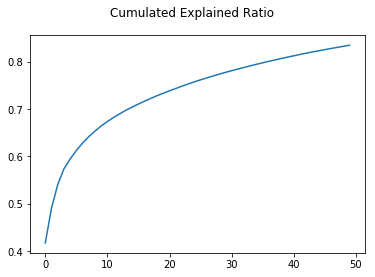

In [15]:
print("Explained Variance Ratio for Each PC: ")
print(lambdas)
print("Cumulated Explained Variance Ratio: ")
print(sum(lambdas))
varexp = np.cumsum(lambdas)
plt.suptitle('Cumulated Explained Ratio')
plt.plot(varexp)
plt.show()

# transform datasets

In [16]:
train_kpca = kpca.transform(trainData)
test_kpca = kpca.transform(testData)
print("Dimension for Transformed Training Set: ")
print(train_kpca.shape)
print("Dimension for Transformed Training Set: ")
print(test_kpca.shape)

Dimension for Transformed Training Set: 
(700, 50)
Dimension for Transformed Training Set: 
(300, 50)


# scatter plot

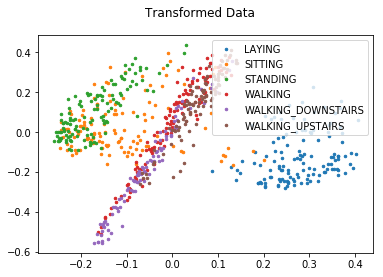

In [17]:
df = pd.DataFrame(dict(x=train_kpca[:,2],y=train_kpca[:,1],label=trainLabel))
groups = df.groupby('label')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=5, label=name)
plt.suptitle('Transformed Data')
ax.legend()
plt.show()


# save KPCA files

In [18]:
# save KPCA data

traindf = pd.DataFrame(train_kpca)
testdf = pd.DataFrame(test_kpca)
traindf = pd.concat([traindf.reset_index(drop=True), pd.DataFrame(trainLabel)], axis=1)
testdf = pd.concat([testdf.reset_index(drop=True), pd.DataFrame(testLabel)], axis=1)

cnames = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
          'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
          'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
          'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40',
          'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50','Activity']
traindf.columns = cnames
testdf.columns = cnames
traindf.to_csv('/Users/MAIN/Desktop/python/train_hid_kpca.csv',index=False)
testdf.to_csv('/Users/MAIN/Desktop/python/test_hid_kpca.csv',index=False)